In [30]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
np.random.seed(42)

Creating independent features using a simple qaudratic equation.

In [33]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X +2 + np.random.randn(m,1)

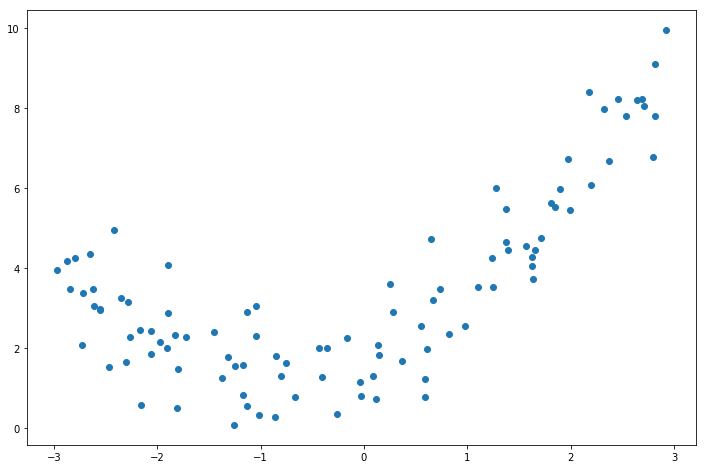

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(X,y,'o')
plt.show()

We will first use a linear regression model.

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [36]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
lin_reg.intercept_,lin_reg.coef_

(array([3.56401543]), array([[0.84362064]]))

Sklearn does not show model summary. We will use statsmodels to have a better understanding of the model.

In [38]:
import statsmodels.api as sm

In [39]:
X_sm = sm.add_constant(X)

In [40]:
model = sm.OLS(y,X_sm).fit()

In [41]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     72.73
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           1.87e-13
Time:                        17:38:08   Log-Likelihood:                -197.23
No. Observations:                 100   AIC:                             398.5
Df Residuals:                      98   BIC:                             403.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5640      0.177     20.185      0.0

R square value is not that good for this particular model and the main reason is that we are fitting a linear regression model for a non linear dataset.

Let's plot the residuals.

In [42]:
y_hat = model.fittedvalues.copy()
y_hat = y_hat.reshape(-1,1)
residual = y - y_hat

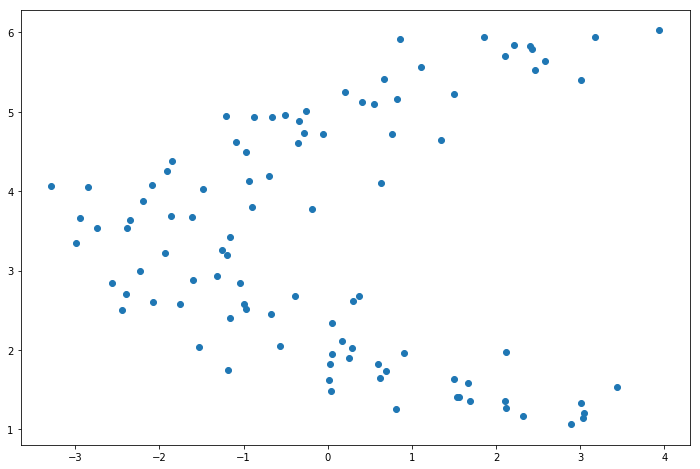

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(residual, y_hat)
plt.show()

There is a clear pattern visible which means the errors are not normally distributed.

Let's use polynomial regression to check if it improves the performance.

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [46]:
X_poly = poly_features.fit_transform(X)

In [47]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [48]:
X[0]

array([-0.75275929])

Now we will use the newly created polynomial features to predict y.

In [49]:
X_sm_poly = sm.add_constant(X_poly)

In [50]:
model = sm.OLS(y,X_sm_poly).fit()

In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     280.3
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           4.85e-41
Time:                        17:38:08   Log-Likelihood:                -129.29
No. Observations:                 100   AIC:                             264.6
Df Residuals:                      97   BIC:                             272.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7813      0.139     12.782      0.0

The R squared value has increased significantly.Also the coefficients of both independent features are positive. Whis is also visible when we plot the data.

In [52]:
y_hat = model.fittedvalues.copy()
y_hat = y_hat.reshape(-1,1)
residual = y - y_hat

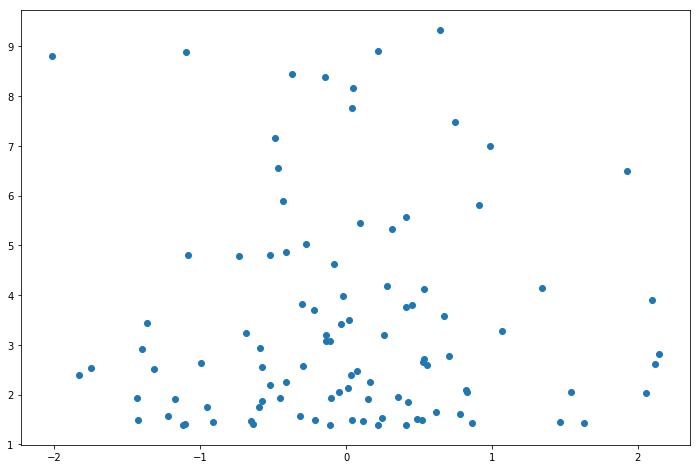

In [53]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(residual, y_hat)
plt.show()

According to this residual plot the errors are random.

Accroding to the coefficients the equation of the regression line will be y = 1.9866 + 0.9880 * x1 + 0.5255 * x1^2.

If we take partial derivative of the above equation then we can find the minimum x value after which the y value started increasing.

In [54]:
min_x = -(0.9880/10510)
print('{0:.10f}'.format(min_x))

-0.0000940057


In this scenario we have used quadratic equation to generate input data and we have used second order polynomial regression.But in real world scenario it is really difficult to decide the order of the polynomial. If we use higher odred polynomial than required then we will end up with overfitted model and if the order is less than the required order the the model will be underfitted.

In such scenarios we can use learning curves to decide the order.

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [56]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(np.sqrt(train_errors),"r",linewidth=2,label='train')
    plt.legend(loc = 'best')
    plt.plot(np.sqrt(val_errors),"b",linewidth=2,label='val')
    plt.legend(loc= 'best')
    

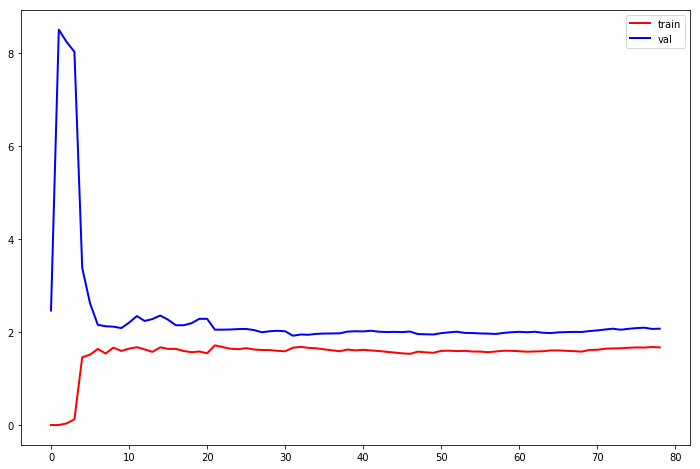

In [57]:
plot_learning_curves(lin_reg,X,y)

This learning curve is of a underfitting model.

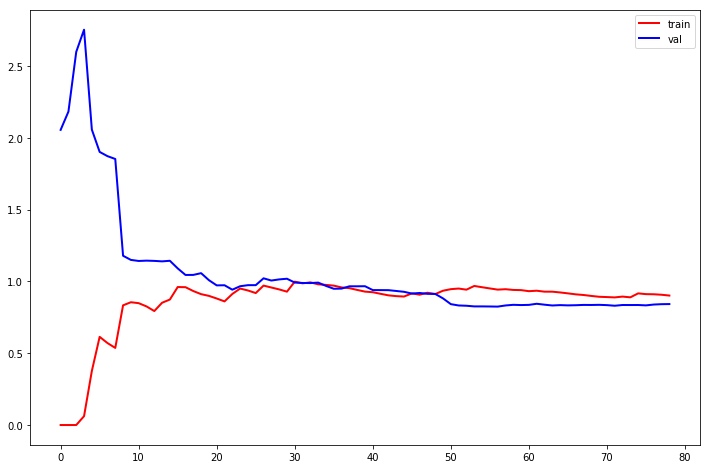

In [58]:
plot_learning_curves(lin_reg,X_poly,y)

The above plot is much better than the previous one and if we increase the training size then thhe distance between the two lines will become negligible.